# Тема: "Определение рисков сердечного приступа"

Содержание:

1. [Разведочный анализ данных](#eda)\
[Выводы](#concl_eda)
2. [Построение модели предсказания риска](#train) \
[Выводы](#concl_train)

In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


<a id='eda'></a>
### EDA 

In [339]:
df = pd.read_csv('archive/heart.csv')
df = df.rename({'cp':'chest_pain','trtbps':'resting_blood_pressure','chol':'cholestoral','fbs':'fasting_blood_sugar','thalachh':'maximum_heart_rate_achieved','slp':'slope','exng':'exercise_induced_angina','caa':'number_of_major_vessels','thall':'thal_rate'}, axis=1)
df

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,restecg,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal_rate,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [340]:
df1 = pd.read_csv('archive/o2Saturation.csv')
df1

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          303 non-null    int64  
 1   sex                          303 non-null    int64  
 2   chest_pain                   303 non-null    int64  
 3   resting_blood_pressure       303 non-null    int64  
 4   cholestoral                  303 non-null    int64  
 5   fasting_blood_sugar          303 non-null    int64  
 6   restecg                      303 non-null    int64  
 7   maximum_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina      303 non-null    int64  
 9   oldpeak                      303 non-null    float64
 10  slope                        303 non-null    int64  
 11  number_of_major_vessels      303 non-null    int64  
 12  thal_rate                    303 non-null    int64  
 13  output              

In [342]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


In [343]:
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,restecg,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal_rate,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [344]:
df.isnull().sum().sum()

0

In [345]:
df1.isnull().sum().sum()

0

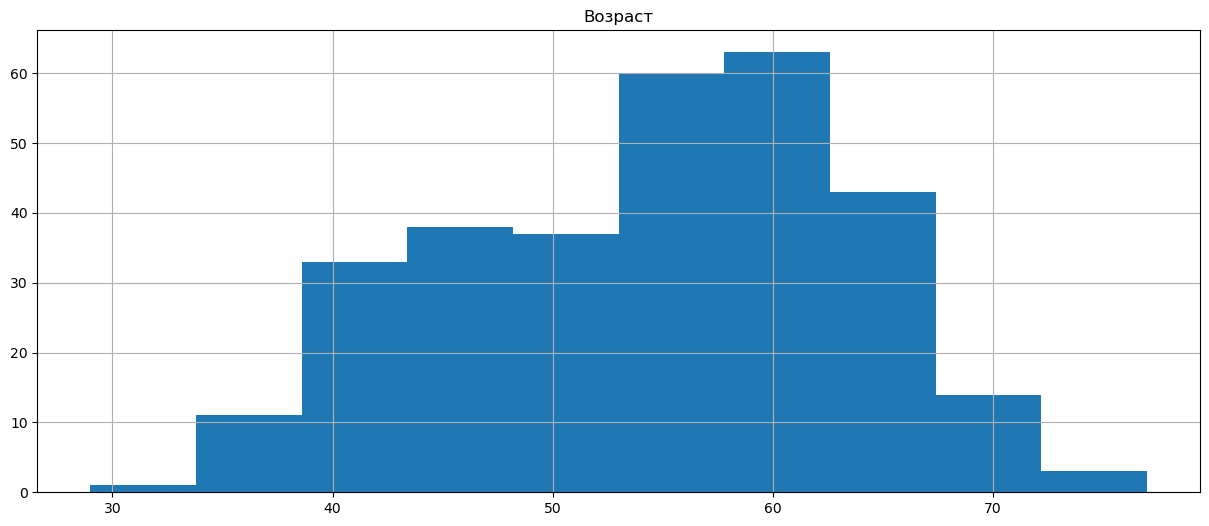

In [346]:
feg , ax = plt.subplots(figsize=(15,6))
df["age"].hist(ax=ax)
plt.title("Возраст");

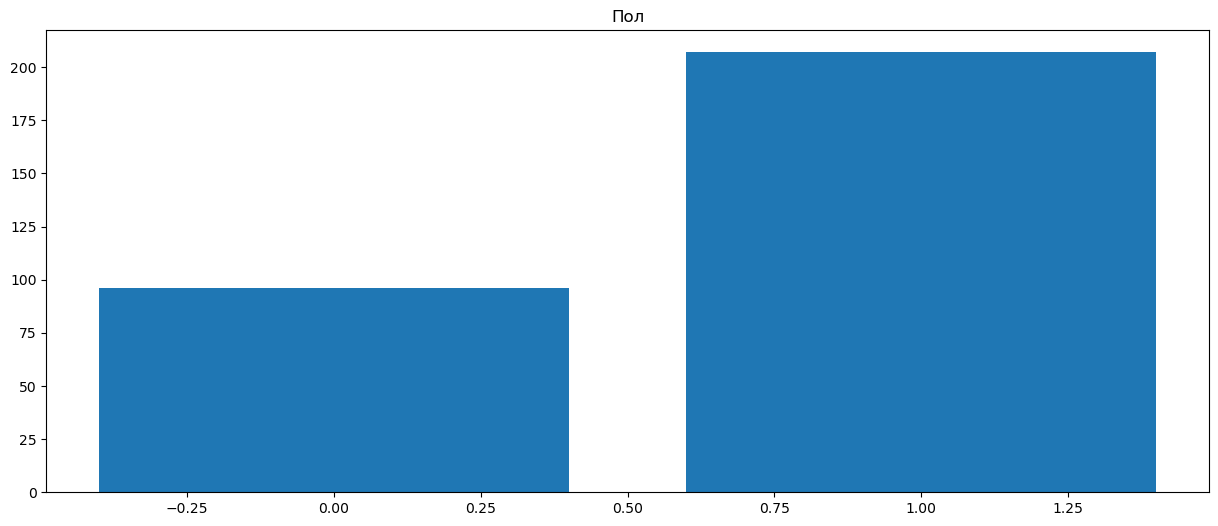

In [347]:
fig, ax = plt.subplots(figsize=(15,6))
plt.bar(x=df['sex'].value_counts().index,height=df['sex'].value_counts().values);
plt.title("Пол");

In [348]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

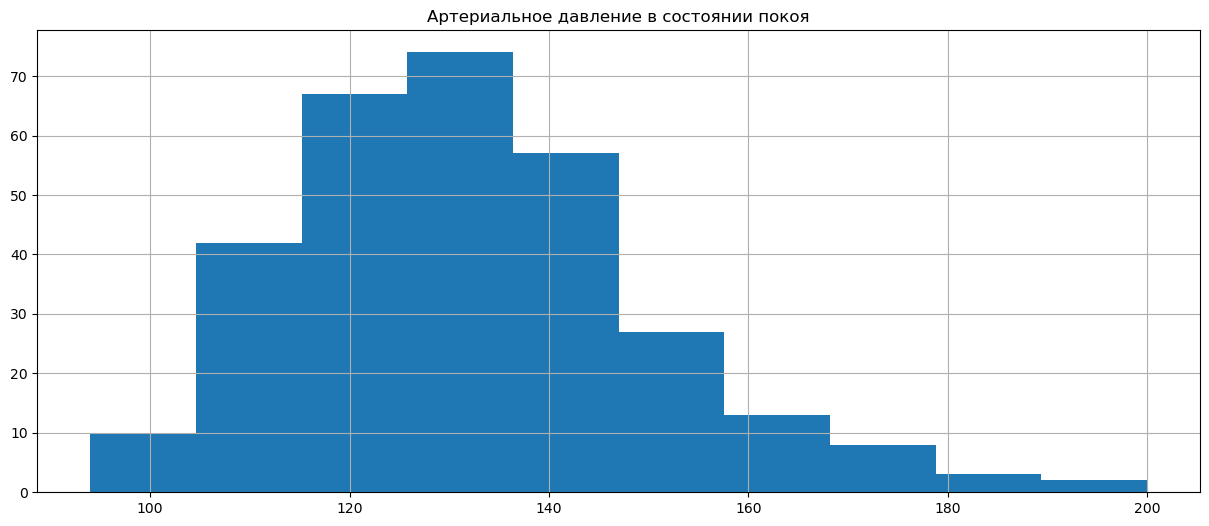

In [349]:
#feg , ax = plt.subplots(figsize=(15,6))
#df["trtbps"].hist(ax=ax)
#plt.title("trtbps");

feg , ax = plt.subplots(figsize=(15,6))
df["resting_blood_pressure"].hist(ax=ax)
plt.title("Артериальное давление в состоянии покоя");

<AxesSubplot:>

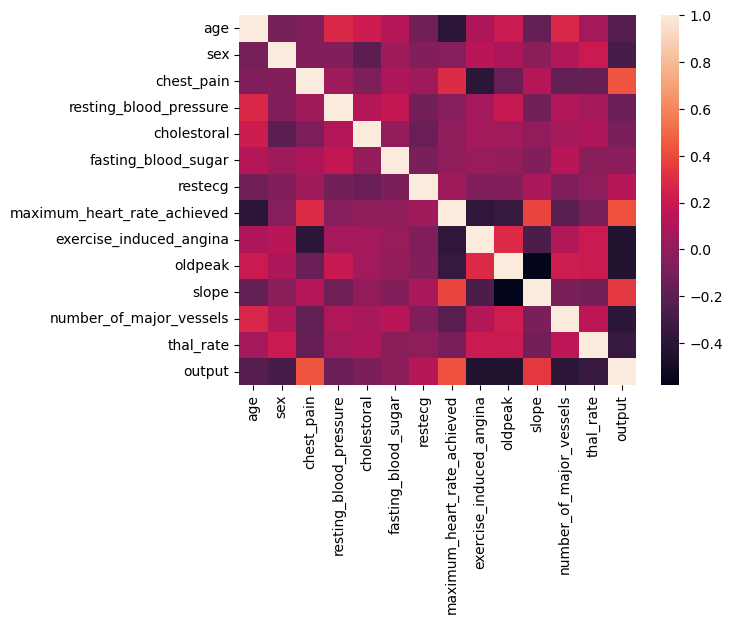

In [350]:
corr = df.corr()
sns.heatmap(corr)

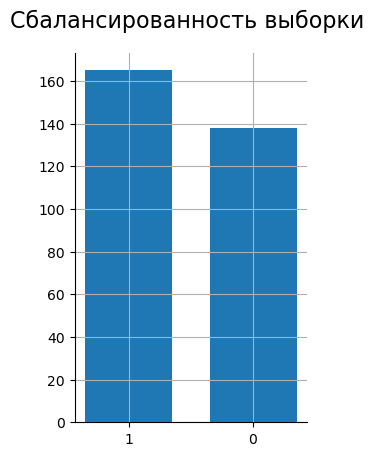

1    165
0    138
Name: output, dtype: int64

In [351]:
class_values = df['output'].unique()

df_1 = df[(df['output']==class_values[0])]
df_0 = df[(df['output']==class_values[1])]

fig, ax = plt.subplots()
fig.set_figwidth(3)
plt.xticks(rotation=0)
plt.suptitle('Сбалансированность выборки', fontsize=16, y=0.97)
ax.bar(['1', '0'], [df_1.shape[0], df_0.shape[0]], width = 0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()
plt.show()

df['output'].value_counts()

<a id='concl_eda'></a>
### Выводы:

- В данных нет пропусков
- Число примеров `sex = 1` в два раза больше чем `sex = 0`
- В основном возраст `age=60`
- Основные значения максимального пульса колеблятся около `resting_blood_pressure=130`
- Данные из dataset `hear` почти все имеют тип int, кроме столбца oldpeak. Его тип float.
- Данные из dataset `o2Saturation`имеют тип float.
- Можно сказать, что выборка почти сбалансированна
- Исходя из цветовой гаммы линейной корреляции можно сказать, что все значения находится в дипазоне чуть ниже среднего.



<a id='train'></a>
## Построение модели
### Дерево решений

In [352]:
df = df.drop(["resting_blood_pressure",'cholestoral','fasting_blood_sugar', 'restecg'], axis=1)
df=pd.DataFrame(df)

In [353]:
y = df['output'].astype('int')
x = df.drop(["output"],axis=1)

In [354]:
x.shape, y.shape

((303, 9), (303,))

In [355]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=2)

In [356]:
first_tree = DecisionTreeClassifier(random_state=2, max_depth=3)

In [357]:
first_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [358]:
y_pred = first_tree.predict(x_test)

In [359]:
accuracy_score(y_pred, y_test.values)

0.8571428571428571

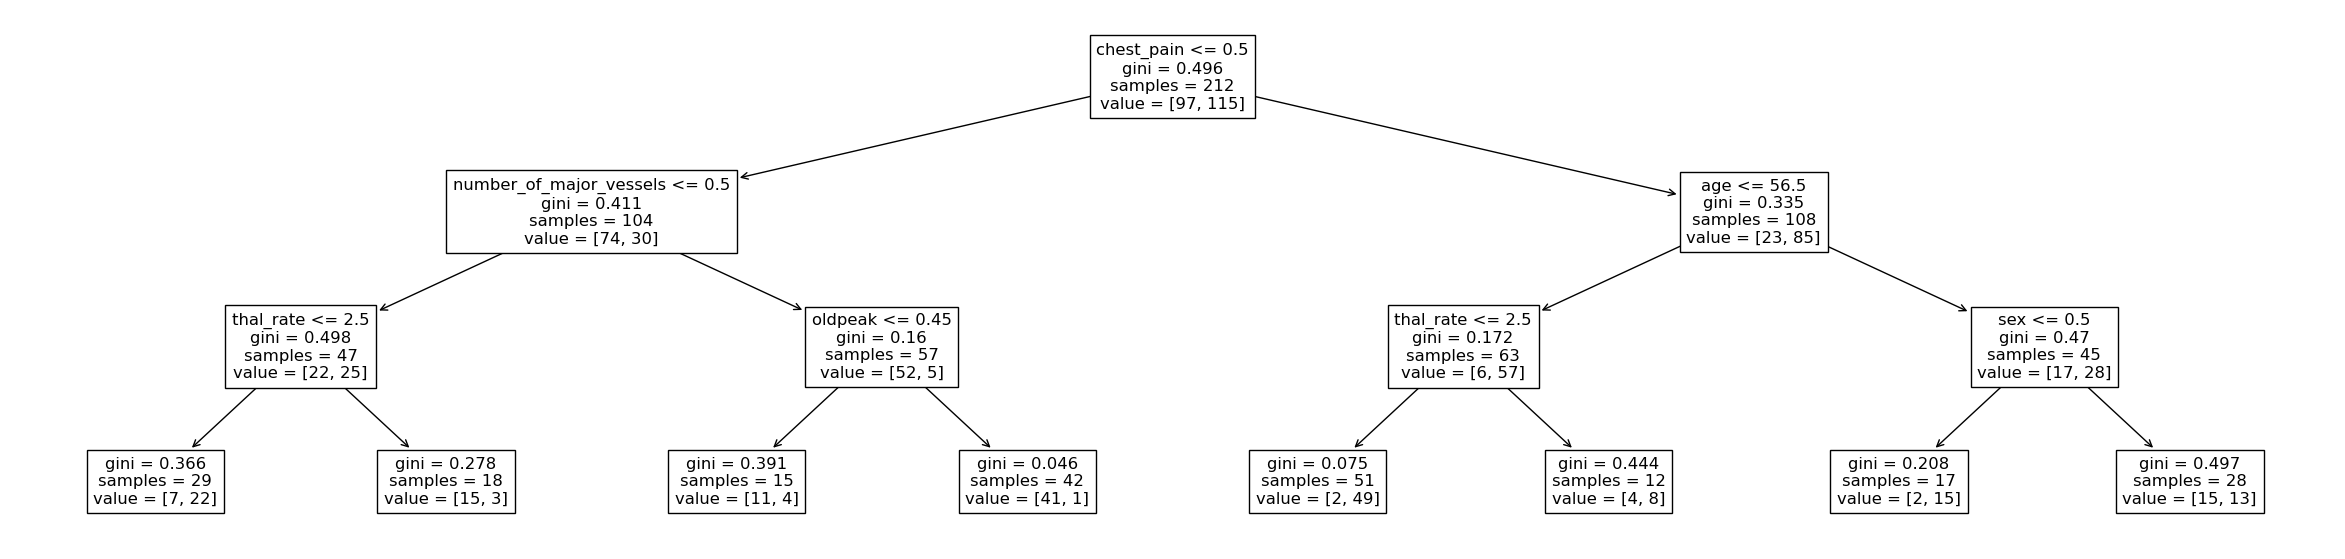

In [360]:
fig = plt.figure(figsize=(30, 7))
plot_tree(first_tree,feature_names=x.columns, filled=False);

In [361]:
second_tree = DecisionTreeClassifier(random_state=2)

In [362]:
np.mean(cross_val_score(second_tree, x_train, y_train, cv=5))

0.7215946843853821

## Поиск по сетке

In [363]:
params = {'max_depth':[2, 3, 4, 5]}

Gs_tree = GridSearchCV(second_tree, 
                       param_grid=params,
                       scoring='accuracy', 
                       cv=5)
Gs_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'max_depth': [2, 3, 4, 5]}, scoring='accuracy')

In [364]:
Gs_tree.best_params_

{'max_depth': 3}

In [365]:
Gs_tree.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=2)

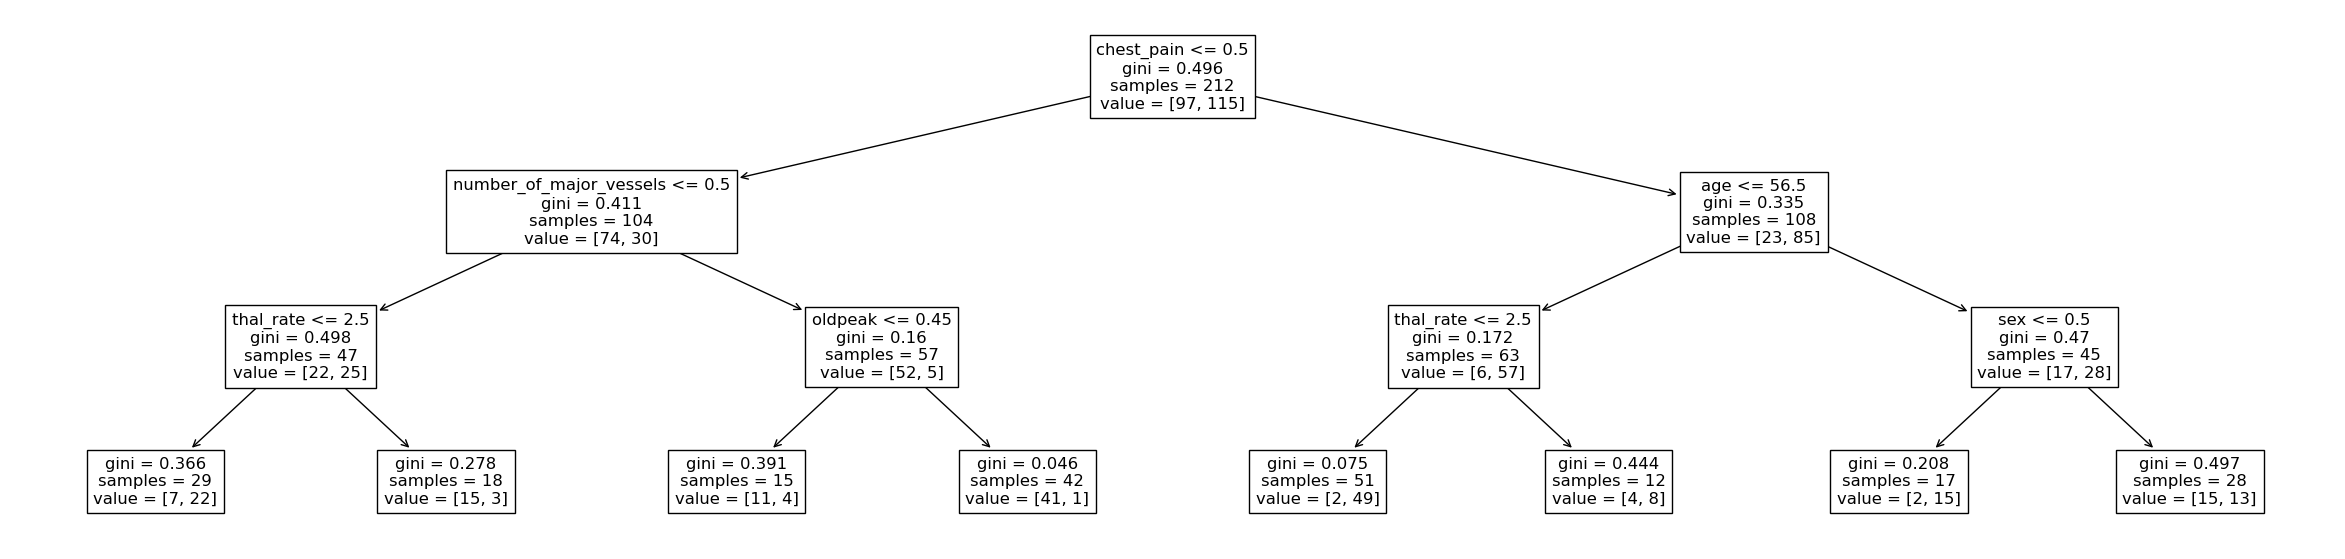

In [366]:
fig = plt.figure(figsize=(30, 7))
plot_tree(Gs_tree.best_estimator_, 
          feature_names=x.columns);

In [367]:
y_pred = Gs_tree.best_estimator_.predict(x_test)

In [368]:
accuracy_score(y_pred, y_test)

0.8571428571428571

<a id='concl_train'></a>
### Выводы

Качество предсказаний получилось давольно точное. Оно равно примерно 0,86.


## Ансамбли

### RandomForestClassifier

In [369]:
model_RandomForest = RandomForestClassifier(random_state=41)

In [370]:
model_RandomForest.n_estimators

100

In [371]:
model_RandomForest.fit(x_train, y_train)

RandomForestClassifier(random_state=41)

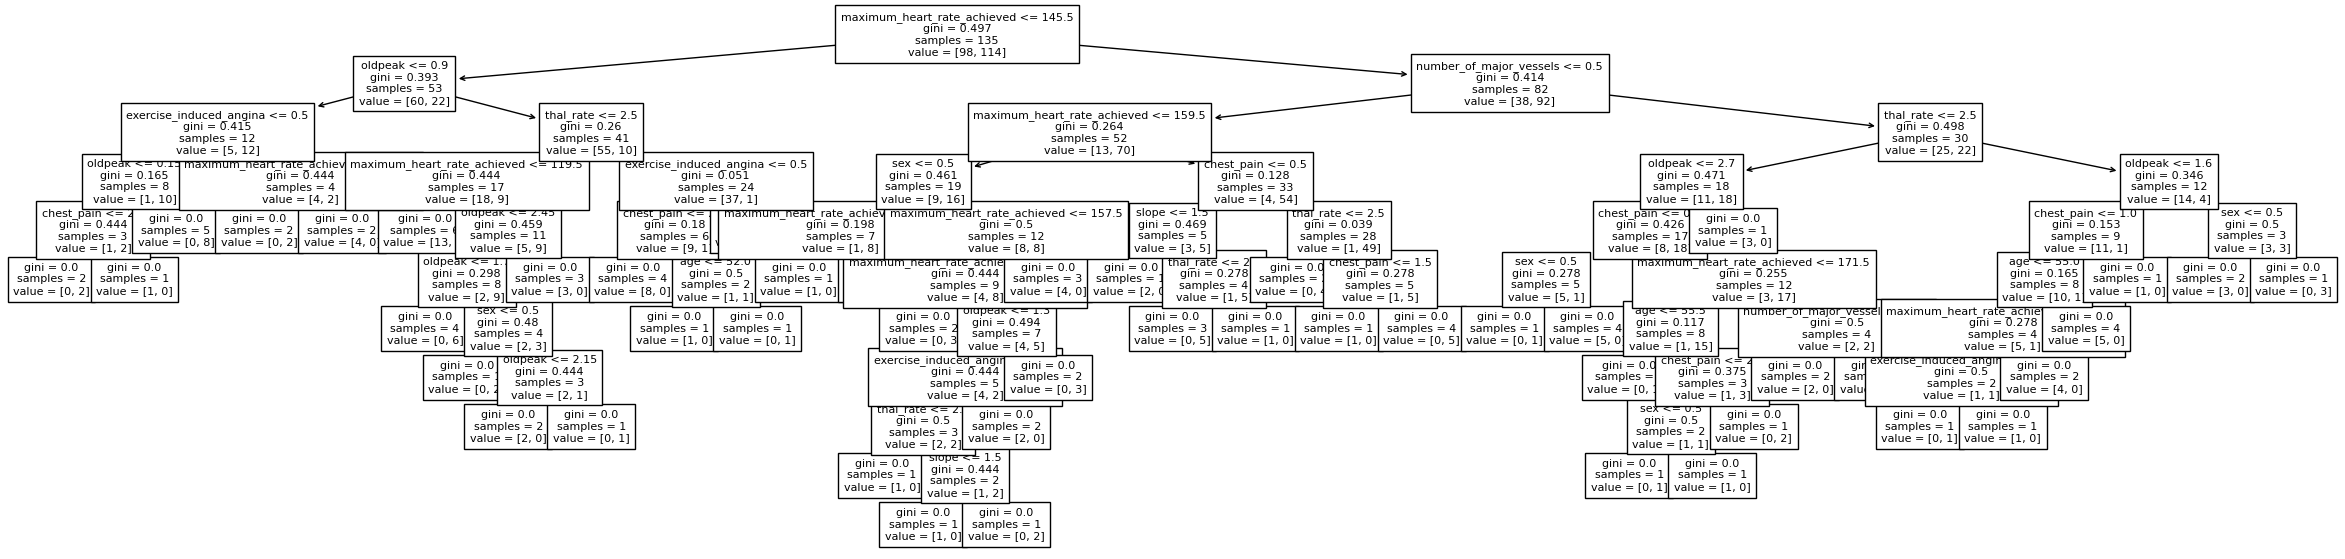

In [372]:
fig = plt.figure(figsize=(30, 7))
plot_tree(model_RandomForest.estimators_[0], 
          feature_names=x.columns, fontsize=8);

In [373]:
y_pred = model_RandomForest.predict(x_test)
accuracy_score(y_pred, y_test)

0.8791208791208791

#### Поиск по сетке для RandomForest

In [374]:
params = {'max_depth':[2, 3, 4, 5, 6, 7]}

Gs_tree = GridSearchCV(RandomForestClassifier(random_state=41), 
                       param_grid=params,
                       scoring='accuracy', 
                       cv=5)
Gs_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=41),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7]}, scoring='accuracy')

In [375]:
Gs_tree.best_score_

0.8021040974529345

In [376]:
best_model = Gs_tree.best_estimator_

In [377]:
y_pred = best_model.predict(x_test)
accuracy_score(y_pred, y_test)

0.9120879120879121

# GradientBoostingClassifier

In [378]:
model = GradientBoostingClassifier(random_state=41)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [379]:
accuracy_score(y_pred, y_test)

0.8791208791208791

### Оценка значимости признаков при построении RandomForestClassifier

In [380]:
importanse_df = pd.DataFrame({'feature_name': best_model.feature_names_in_, 
                              'importance': best_model.feature_importances_})


In [388]:
importanse_df = pd.DataFrame({'feature_name': best_model.feature_names_in_, 
                             'importance': best_model.feature_importances_})

importanse_df

,feature_name,importance
0,age,0.089008
1,sex,0.035218
2,chest_pain,0.177191
3,maximum_heart_rate_achieved,0.142216
4,exercise_induced_angina,0.079034
5,oldpeak,0.141947
6,slope,0.066559
7,number_of_major_vessels,0.133314
8,thal_rate,0.135512


<AxesSubplot:xlabel='feature_name', ylabel='importance'>

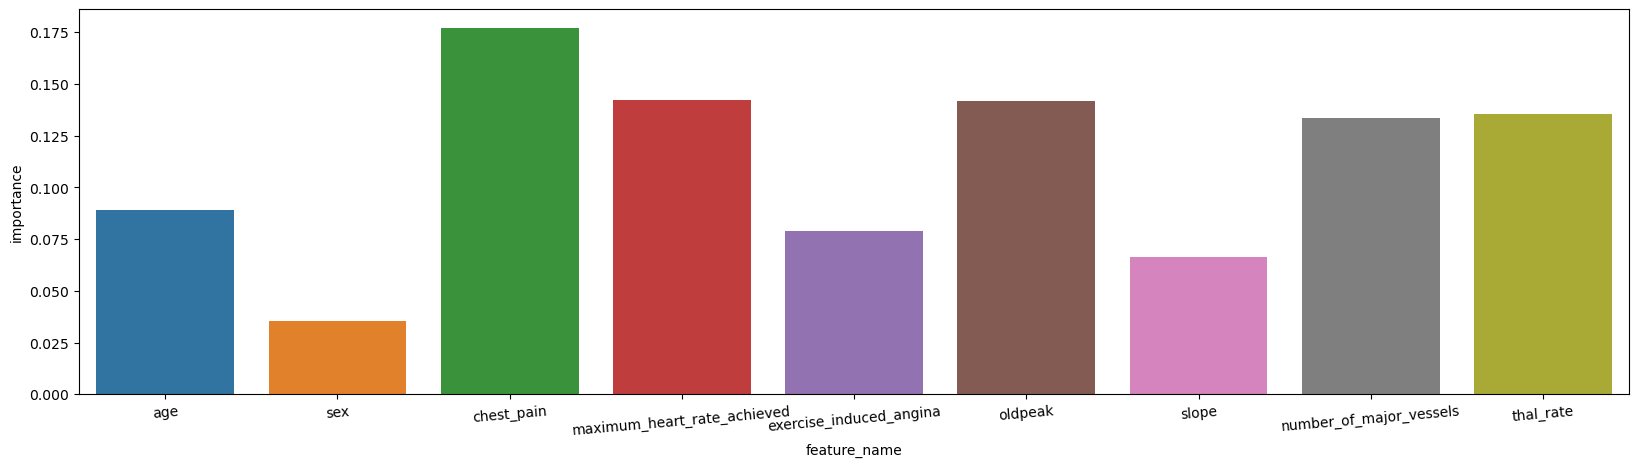

In [381]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=5)
sns.barplot(x = importanse_df['feature_name'], y = importanse_df ['importance']) 

In [382]:
len(importanse_df)

9

## Сохранение и вывод данных

In [383]:
inference_model = 'tree_classification_of_heart_attacks.pkl'
with open(inference_model, 'wb') as file:
    pickle.dump(best_model, file) 

In [384]:
with open (inference_model, 'rb') as file:
    load_model=pickle.load(file)

In [385]:
y_pred = load_model.predict(x_test)

In [386]:
accuracy_score(y_pred, y_test)

0.9120879120879121

In [387]:
# сохраняем пример входного файла для GUI
x_test.to_csv('Gui.csv', index=False)